In [4]:
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev
import os

In [5]:
os.chdir('/Users/dfareri/Desktop')
ELAdata = pd.read_csv(r'Reward_PastExperiences_data_UPDATED.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(ELAdata)

                      dem_ID  dem_AGE  dem_SEX  dem_GENDER  dem_ETHNICITY  \
0   572535bba34b2a001306827c       36        1           1              1   
1   59474c89c7855f0001cb67f6       35        2           2              2   
2   596e5b7dc2e0220001c1015f       34        2           2              2   
3   5a7d0c5beea3d300016e24ac       37        1           1              2   
4   5b9845dfae52a00001482c02       36        1           1              2   
5   5bc65bbf650bbd0001469352       30        1           1              2   
6   5bd52c0a860b840001dbe032       33        1           1              2   
7   5c134ee7e32f86000165ba0d       24        2           3              2   
8   5c37a288191d3b000195d365       39        2           2              2   
9   5c935d881754ba001b25697a       37        2           2              2   
10  5c9a6e18fc4fa10001510344       24        2           2              2   
11  5caa7f8c0d95570013d82f2f       32        2           2              1   

In [6]:
print(len(ELAdata))

ELAdata.corr()

65


,dem_AGE,dem_SEX,dem_GENDER,dem_ETHNICITY,dem_RACE,PerceivedStress,STAI_state,STAI_trait,CESD,DOSPERT_ethical,DOSPERT_financial,DOSPERT_recreational,DOSPERT_healthsafety,DOSPERT_social,SPSRQ_punishment,SPSRQ_reward,R_ACES,QUIC_parental_monitoring,QUIC_parental_predictability,QUIC_parental_environment,QUIC_physical_environment,QUIC_safety_security,QUIC_total,BRCS
dem_AGE,1.000000,-0.080579,-0.106595,-0.132406,-0.092056,-0.272118,-0.182113,-0.289309,-0.186476,-0.303293,-0.002786,-0.291496,-0.229923,0.195929,-0.240925,-0.258420,-0.088823,-0.055256,-0.202228,-0.049739,-0.202228,-0.202228,-0.145628,0.174079
dem_SEX,-0.080579,1.000000,0.952249,0.099434,0.180096,0.025093,-0.027108,0.043895,-0.030055,-0.277103,-0.310293,-0.031171,-0.296920,-0.122651,0.281522,-0.273105,0.027043,-0.188567,0.122737,0.064429,0.122737,0.122737,0.053028,-0.069525
dem_GENDER,-0.106595,0.952249,1.000000,0.109977,0.128834,0.081104,0.019593,0.116519,0.019144,-0.190676,-0.303458,-0.075319,-0.317071,-0.082770,0.332160,-0.214620,0.061032,-0.188686,0.153991,0.048024,0.153991,0.153991,0.068923,-0.108312
dem_ETHNICITY,-0.132406,0.099434,0.109977,1.000000,-0.024052,0.091644,0.086656,0.019949,0.035435,-0.045019,-0.105366,0.051323,0.080855,0.052456,0.054885,0.017279,-0.029909,-0.057566,0.161228,0.018499,0.161228,0.161228,0.100593,-0.050002
dem_RACE,-0.092056,0.180096,0.128834,-0.024052,1.000000,-0.147682,-0.001273,-0.050897,-0.062048,0.055967,-0.115336,0.061983,0.101912,0.140687,0.085289,-0.076906,-0.005257,0.020475,-0.024538,0.060868,-0.024538,-0.024538,-0.005577,0.086172
PerceivedStress,-0.272118,0.025093,0.081104,0.091644,-0.147682,1.000000,0.595967,0.671398,0.753151,0.197768,-0.034247,-0.069958,0.169042,-0.197850,0.486121,0.155184,0.257654,0.068849,0.214771,0.094058,0.214771,0.214771,0.175508,-0.533327
STAI_state,-0.182113,-0.027108,0.019593,0.086656,-0.001273,0.595967,1.000000,0.775458,0.834002,0.302708,-0.023362,-0.022095,0.271667,0.028515,0.543575,0.074906,0.332701,0.157365,0.236375,0.243902,0.236375,0.236375,0.253331,-0.629833
STAI_trait,-0.289309,0.043895,0.116519,0.019949,-0.050897,0.671398,0.775458,1.000000,0.898241,0.372079,-0.077370,-0.094529,0.249454,-0.147036,0.720435,0.093572,0.398109,0.170871,0.366020,0.189670,0.366020,0.366020,0.324724,-0.728351
CESD,-0.186476,-0.030055,0.019144,0.035435,-0.062048,0.753151,0.834002,0.898241,1.000000,0.281381,-0.101662,-0.116238,0.249160,-0.173204,0.606260,0.152865,0.442947,0.118614,0.339250,0.218152,0.339250,0.339250,0.309691,-0.620995
DOSPERT_ethical,-0.303293,-0.277103,-0.190676,-0.045019,0.055967,0.197768,0.302708,0.372079,0.281381,1.000000,0.366747,0.278347,0.459001,0.213866,0.176160,0.184120,0.297402,0.325768,0.262871,0.209044,0.262871,0.262871,0.287191,-0.279077


<AxesSubplot:>

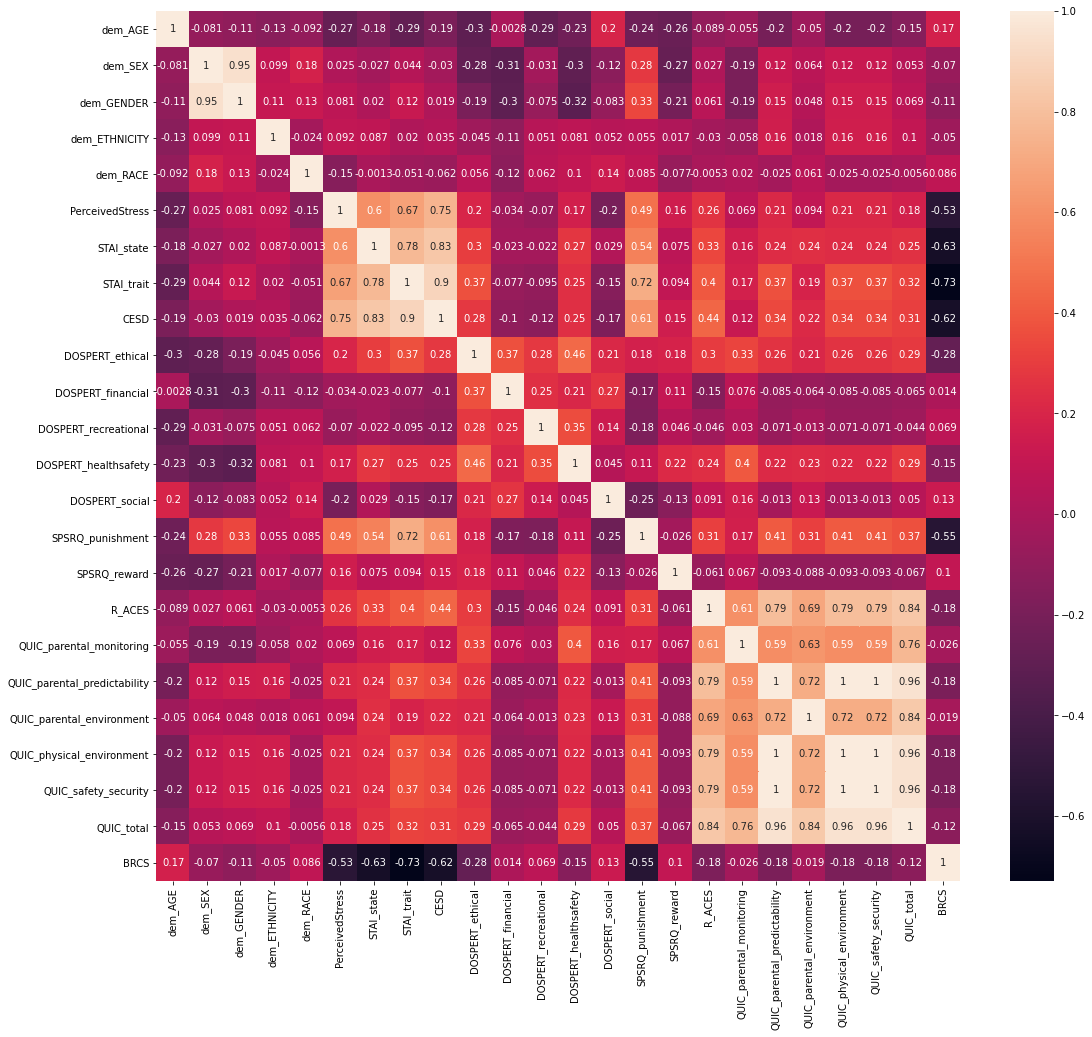

In [7]:
plt.figure(figsize=(18,16))
sns.heatmap(ELAdata.corr(),annot=True)

Pearsons correlation: 0.443
p value: 0.0002


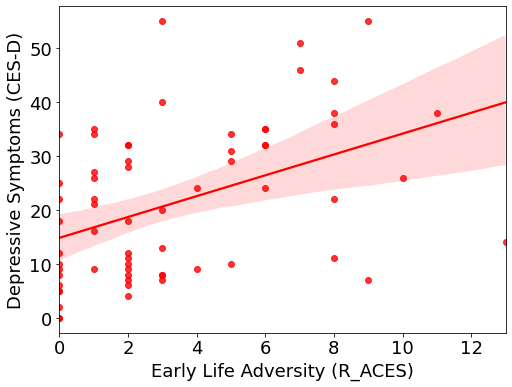

In [60]:
x = ELAdata['R_ACES']
y = ELAdata['CESD']
plt.figure(figsize=(8,6))

plot1 = sns.regplot(x='R_ACES',y='CESD',data = ELAdata,color='red')
plot1.set_ylabel("Depressive Symptoms (CES-D)",fontsize=18)
plot1.set_xlabel("Early Life Adversity (R_ACES)",fontsize=18)
plot1.tick_params(labelsize=18)

plot1.figure.savefig('RACES_CES_scatter.jpeg')

r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)


Pearsons correlation: 0.310
p value: 0.0121


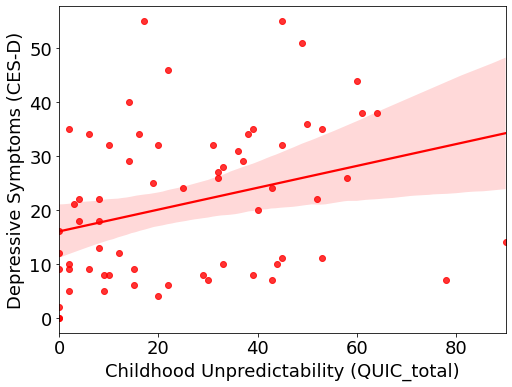

In [53]:
x = ELAdata['QUIC_total']
y = ELAdata['CESD']

plt.figure(figsize=(8,6))
plot2 = sns.regplot(x='QUIC_total',y='CESD',data = ELAdata,color='red')
plot2.set_ylabel("Depressive Symptoms (CES-D)",fontsize=18)
plot2.set_xlabel("Childhood Unpredictability (QUIC_total)",fontsize=18)
plot2.tick_params(labelsize=18)

plot2.figure.savefig('QUIC_CES_scatter.jpeg')

r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)

Pearsons correlation: 0.311
p value: 0.0116


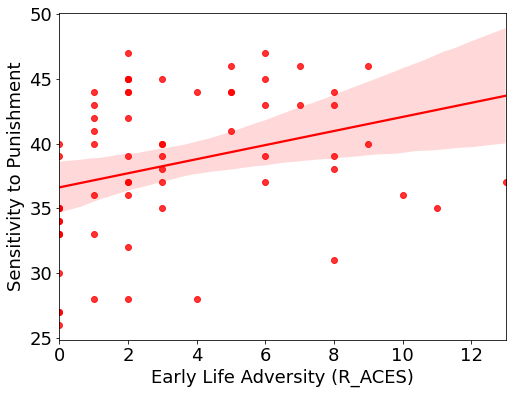

In [55]:
x = ELAdata['R_ACES']
y = ELAdata['SPSRQ_punishment']

plt.figure(figsize=(8,6))
plot2 = sns.regplot(x='R_ACES',y='SPSRQ_punishment',data = ELAdata,color='red')
plot2.set_ylabel("Sensitivity to Punishment",fontsize=18)
plot2.set_xlabel("Early Life Adversity (R_ACES)",fontsize=18)
plot2.tick_params(labelsize=18)
plot2.figure.savefig('RACES_Punish_scatter.jpeg')

r,p = scipy.stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)



Pearsons correlation: 0.369
p value: 0.0025


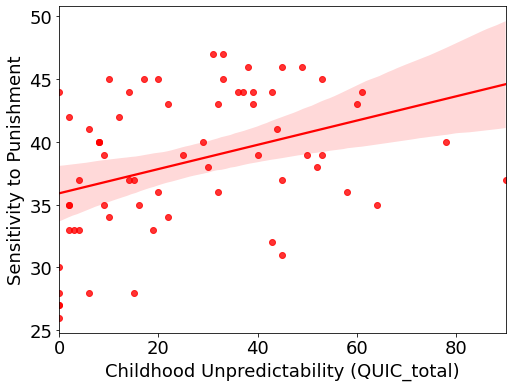

In [54]:
x1 = ELAdata['QUIC_total']
y1 = ELAdata['SPSRQ_punishment']


plt.figure(figsize=(8,6))
plot2 = sns.regplot(x='QUIC_total',y='SPSRQ_punishment',data = ELAdata,color='red')
plot2.set_ylabel("Sensitivity to Punishment",fontsize=18)
plot2.set_xlabel("Childhood Unpredictability (QUIC_total)",fontsize=18)
plot2.tick_params(labelsize=18)
plot2.figure.savefig('QUIC_Punish_scatter.jpeg')


r,p = scipy.stats.pearsonr(x1, y1)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)

Pearsons correlation: 0.258
p value: 0.0383


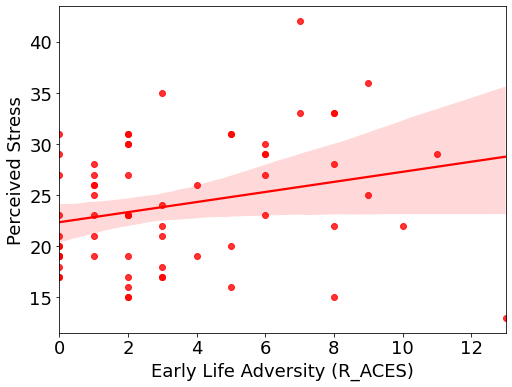

In [10]:
x1 = ELAdata['R_ACES']
y1 = ELAdata['PerceivedStress']

plt.figure(figsize=(8,6))
plot2 = sns.regplot(x='R_ACES',y='PerceivedStress',data = ELAdata,color='red')
plot2.set_ylabel("Perceived Stress",fontsize=18)
plot2.set_xlabel("Early Life Adversity (R_ACES)",fontsize=18)
plot2.tick_params(labelsize=18)
plot2.figure.savefig('R_ACES_Stress.jpeg')

r,p = scipy.stats.pearsonr(x1, y1)
print('Pearsons correlation: %.3f' % r)
print('p value: %.4f' % p)